# 範例

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

In [1]:
import cv2
import numpy as np
from cv2plt import *

img = cv2.imread('data/lena.png')

## 模糊

In [29]:
img_blur = img.copy()

# 重複多次 Gaussian 模糊的操作來加深模糊的程度
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)

#　組合 + 顯示圖片
img_show = np.hstack((img, img_blur))

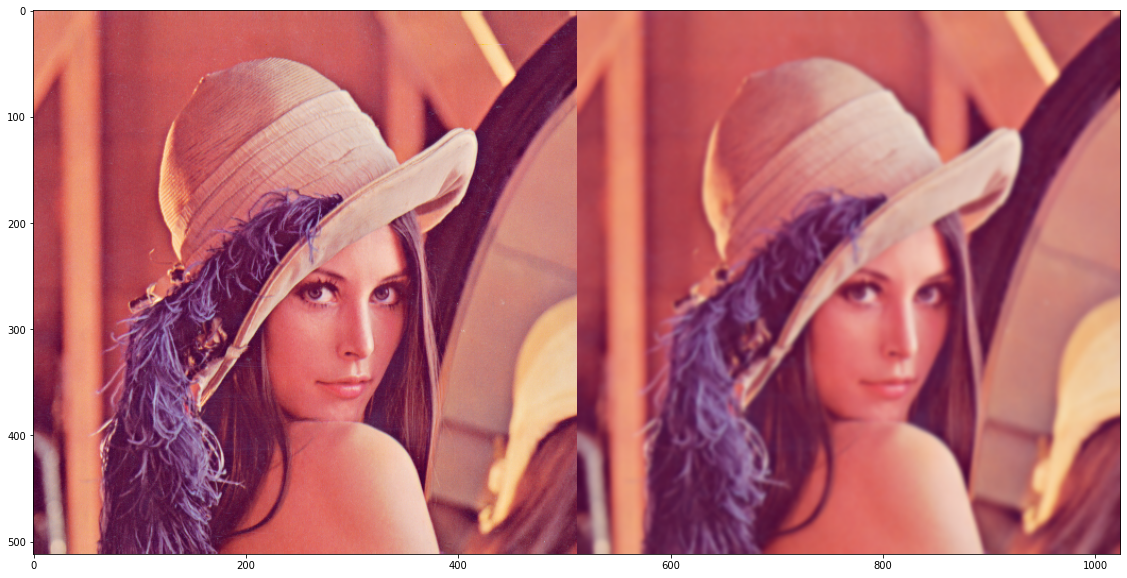

In [30]:
from matplotlib import pyplot as plt
f = plt.figure(figsize=(20, 10))

f.add_subplot(1, 1, 1)
plt.imshow(cv2plt(img_show))

plt.show(block=True)

## 邊緣檢測

### 組合 x-axis, y-axis 的影像合成

In [55]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向做 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 y 方向做 Sobel 邊緣檢測
img_sobel_y = cv2.Sobel(img_grey, cv2.CV_16S, dx=0, dy=1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

# x, y 方向的邊緣檢測後的圖各以一半的全重進行合成
img_sobel_combine = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)

#　組合 + 顯示圖片
img_show = np.hstack((img_sobel_x, img_sobel_y, img_sobel_combine))

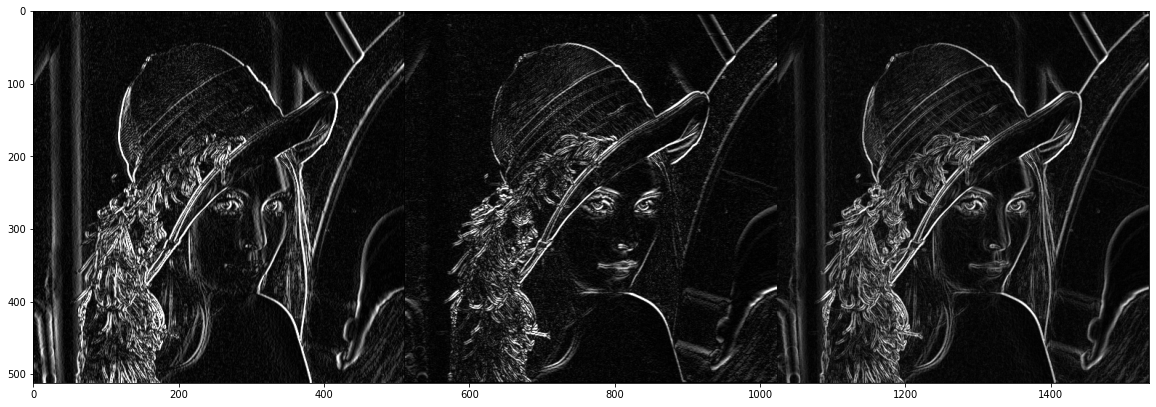

In [56]:
f = plt.figure(figsize=(20, 10))

f.add_subplot(1, 1, 1)
plt.imshow(cv2plt(img_show))

plt.show(block=True)